**ASSIGNMENT-102303493**

**Learn Probability Density Functions using Roll Number Parameterized Non Linear Model**

Upload Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [4]:
df = pd.read_csv('data.csv',encoding='latin-1',low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Taking NO2 as feature

In [7]:
x = df['no2']
x.dropna()
x=x[x>=0]
x.describe()

count    419509.000000
mean         25.809623
std          18.503086
min           0.000000
25%          14.000000
50%          22.000000
75%          32.200000
max         876.000000
Name: no2, dtype: float64

Original distribution

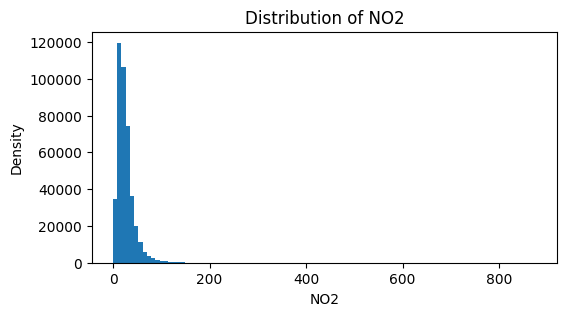

In [8]:
plt.figure(figsize=(6,3))
plt.hist(x,bins=100)
plt.title("Distribution of NO2")
plt.xlabel("NO2")
plt.ylabel("Density")
plt.show()

**STEP 1**

Transform each value of x into z using the transformation function

In [10]:
r = 102303493
ar = 0.05*(r%7)
br = 0.3*((r%5)+1)

z = x+ar*np.sin(br*x)

Distribution

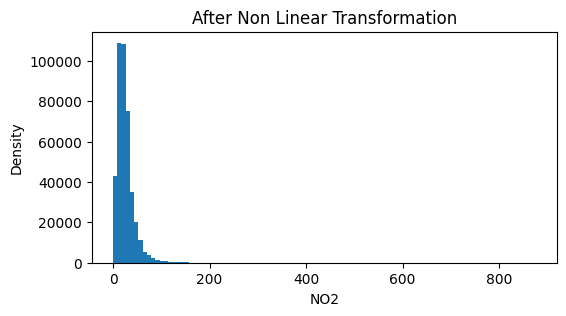

In [11]:
plt.figure(figsize=(6,3))
plt.hist(z,bins=100)
plt.title("After Non Linear Transformation")
plt.xlabel("NO2")
plt.ylabel("Density")
plt.show()

**STEP 2**

Learn parameters

In [17]:
mu = np.mean(z)
var = np.var(z)
p_lambda = 1/(2*var)
c = (1/(var*np.sqrt(2*np.pi)))
print("mu:",mu,"\nlambda:",p_lambda,"\nc:",c)

mu: 25.8041489341447 
lambda: 0.0014596395020856768 
c: 0.0011646238230521434


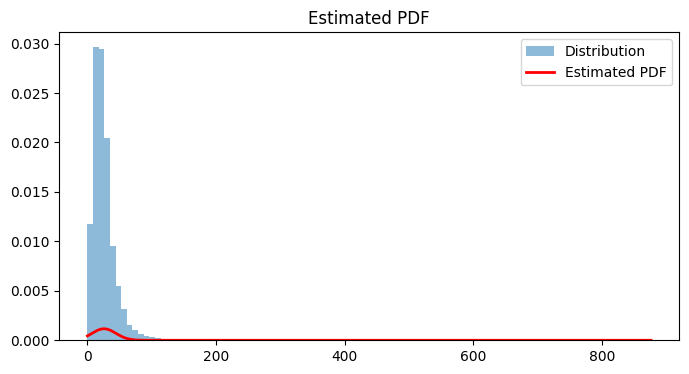

In [18]:
z_range = np.linspace(z.min(), z.max(), 500)
pdf_estimated = c * np.exp(-p_lambda * (z_range - mu)**2)

plt.figure(figsize=(8,4))
plt.hist(z, bins=100, density=True, alpha=0.5, label="Distribution")
plt.plot(z_range, pdf_estimated, 'r', linewidth=2, label="Estimated PDF")
plt.legend()
plt.title("Estimated PDF")
plt.show()